### Definindo as métricas e modelos de previsão.

O problema é de **Regressão** <br>
As métricas serão **R2** e **RSME**<br>
Os modelos testados serão **Linear Regression**, **Random Florest**, **Extra trees**, **Redes Neurais**<br>

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import seaborn as sns   
import time

# Modelos
modelo_rf = RandomForestRegressor(random_state=42)
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor(random_state=42)
modelo_xgb = XGBRegressor(random_state=42, n_estimators=500, learning_rate=0.05)
modelo_lgbm = LGBMRegressor(random_state=42, n_estimators=500, learning_rate=0.05,verbose=-1)
modelo_knn = KNeighborsRegressor(n_neighbors=10)

modelos = {'Random Forest': modelo_rf,
           'Regressão Linear': modelo_lr,
           'Extra Tree': modelo_et,
           'XGBoost': modelo_xgb,
           'LightGBM': modelo_lgbm,
           'KNN': modelo_knn}

df = pd.read_csv(r'Dataframe_airbnb\listings_tratada_v3.csv')

display(df.head())

,host_is_superhost,accommodates,beds,price,extra_people,minimum_nights,instant_bookable,Kitchen,Wifi,Essentials,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_no_flexible,relation_bathrooms_bedrooms,cluster
0,1.0,5.0,2.0,5.241747,0.0,7.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.000000,2
1,0.0,6.0,4.0,6.093570,0.0,5.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
2,0.0,2.0,2.0,5.081404,45.0,7.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
3,1.0,3.0,1.0,5.886104,55.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,7
4,0.0,2.0,1.0,6.206576,0.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,2


loo = LeaveOneOut() -> Ideal para poucas amostras 

In [2]:
from sklearn.model_selection import cross_validate, cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np
import time

# Função de RMSE para scoring
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Função que avalia o modelo usando K-Fold CV
def avaliar_modelo(nome_modelo, modelo, X, y):
    
    scoring = {
        'R2': 'r2',
        'RMSE': make_scorer(rmse, greater_is_better=False)  
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Inicia o contador
    inicio = time.time()

    resultados = cross_validate(modelo, X, y, cv=kf, scoring=scoring)
    y_pred = cross_val_predict(modelo, X, y, cv=kf)

    # Finaliza o contador
    fim = time.time()
    tempo_execucao = fim - inicio
    
    r2_medio = np.mean(resultados['test_R2'])
    r2_std = np.std(resultados['test_R2'])
    rmse_medio = -np.mean(resultados['test_RMSE'])  
    rmse_std = np.std(resultados['test_RMSE'])
    mae_real = mean_absolute_error(np.expm1(y), np.expm1(y_pred))

    print(f'O modelo {nome_modelo}:')
    print(f'R² médio: {r2_medio:.4f} ± {r2_std:.4f}')
    print(f'RMSE médio: {rmse_medio:.2f} ± {rmse_std:.2f}')
    print(f'MAE: {mae_real:.2f}')
    print(f'Tempo de execução: {tempo_execucao:.2f} segundos\n')


In [12]:
y = df['price']
X = df.drop('price',axis=1)

scaler = MinMaxScaler() #SanterdScaler()
X = scaler.fit_transform(X)

for nome_modelo, modelo in modelos.items():
    avaliar_modelo(nome_modelo, modelo, X, y)

O modelo Random Forest:
R² médio: 0.4791 ± 0.0048
RMSE médio: 0.5498 ± 0.0041
Tempo de execução: 102.42 segundos

O modelo Regressão Linear:
R² médio: 0.3715 ± 0.0094
RMSE médio: 0.6039 ± 0.0038
Tempo de execução: 0.59 segundos

O modelo Extra Tree:
R² médio: 0.4485 ± 0.0063
RMSE médio: 0.5657 ± 0.0046
Tempo de execução: 283.26 segundos

O modelo XGBoost:
R² médio: 0.5000 ± 0.0069
RMSE médio: 0.5386 ± 0.0052
Tempo de execução: 4.11 segundos



C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRe

O modelo LightGBM:
R² médio: 0.5004 ± 0.0073
RMSE médio: 0.5384 ± 0.0061
Tempo de execução: 3.71 segundos

O modelo KNN:
R² médio: 0.3141 ± 0.0128
RMSE médio: 0.6309 ± 0.0028
Tempo de execução: 1.35 segundos



In [ ]:
# O melhor resultado com SanterdScaler() foi XGBoost com R² médio: 0.5000 ± 0.0069 e RMSE médio: 0.5386 ± 0.0052
# O melhor resultado com MinMaxScaler() foi Light com R² médio: 0.5004 ± 0.0073 e RMSE médio: 0.5384 ± 0.0061

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

df = pd.read_csv(r'Dataframe_airbnb\listings_tratada_v3.csv')
y = df['price']
X = df.drop('price',axis=1)

scoring = {
    'R2': 'r2',
    'RMSE': make_scorer(rmse, greater_is_better=False)  
}

scaler = StandardScaler()
X = scaler.fit_transform(X)

param_grid = {
    'n_estimators': [1000],
    'max_depth': [10, 20],
    'learning_rate': [0.01],
    'subsample': [0.7],
    'colsample_bytree': [0.2, 0.5],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit='R2', verbose=1)
grid_search.fit(X, y)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor R²:", grid_search.best_score_)
print("Melhor RMSE:", -grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_])

resultados = pd.DataFrame(grid_search.cv_results_)

colunas_interesse = [
    'params',
    'mean_test_R2',
    'mean_test_RMSE',
    'rank_test_R2',
    'rank_test_RMSE'
]
print(resultados[colunas_interesse].sort_values(by='rank_test_R2'))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.7}
Melhor R²: 0.5154667987751257
Melhor RMSE: 0.5302795915049913
                                              params  mean_test_R2  \
2  {'colsample_bytree': 0.5, 'learning_rate': 0.0...      0.515467   
1  {'colsample_bytree': 0.2, 'learning_rate': 0.0...      0.506174   
0  {'colsample_bytree': 0.2, 'learning_rate': 0.0...      0.505434   
3  {'colsample_bytree': 0.5, 'learning_rate': 0.0...      0.499301   

   mean_test_RMSE  rank_test_R2  rank_test_RMSE  
2       -0.530280             1               1  
1       -0.535334             2               2  
0       -0.535734             3               3  
3       -0.539049             4               4  


In [5]:
import joblib

y = df['price']
X = df.drop('price',axis=1)
modelo_xgb = XGBRegressor(random_state=42, n_estimators=1000, learning_rate=0.01, max_depth=10, subsample=0.9, colsample_bytree=0.5)
modelo_xgb.fit(X, y)

# Salvar o modelo
joblib.dump(modelo_xgb, 'modelo_xgb.pkl')

['modelo_xgb.pkl']

<Axes: >

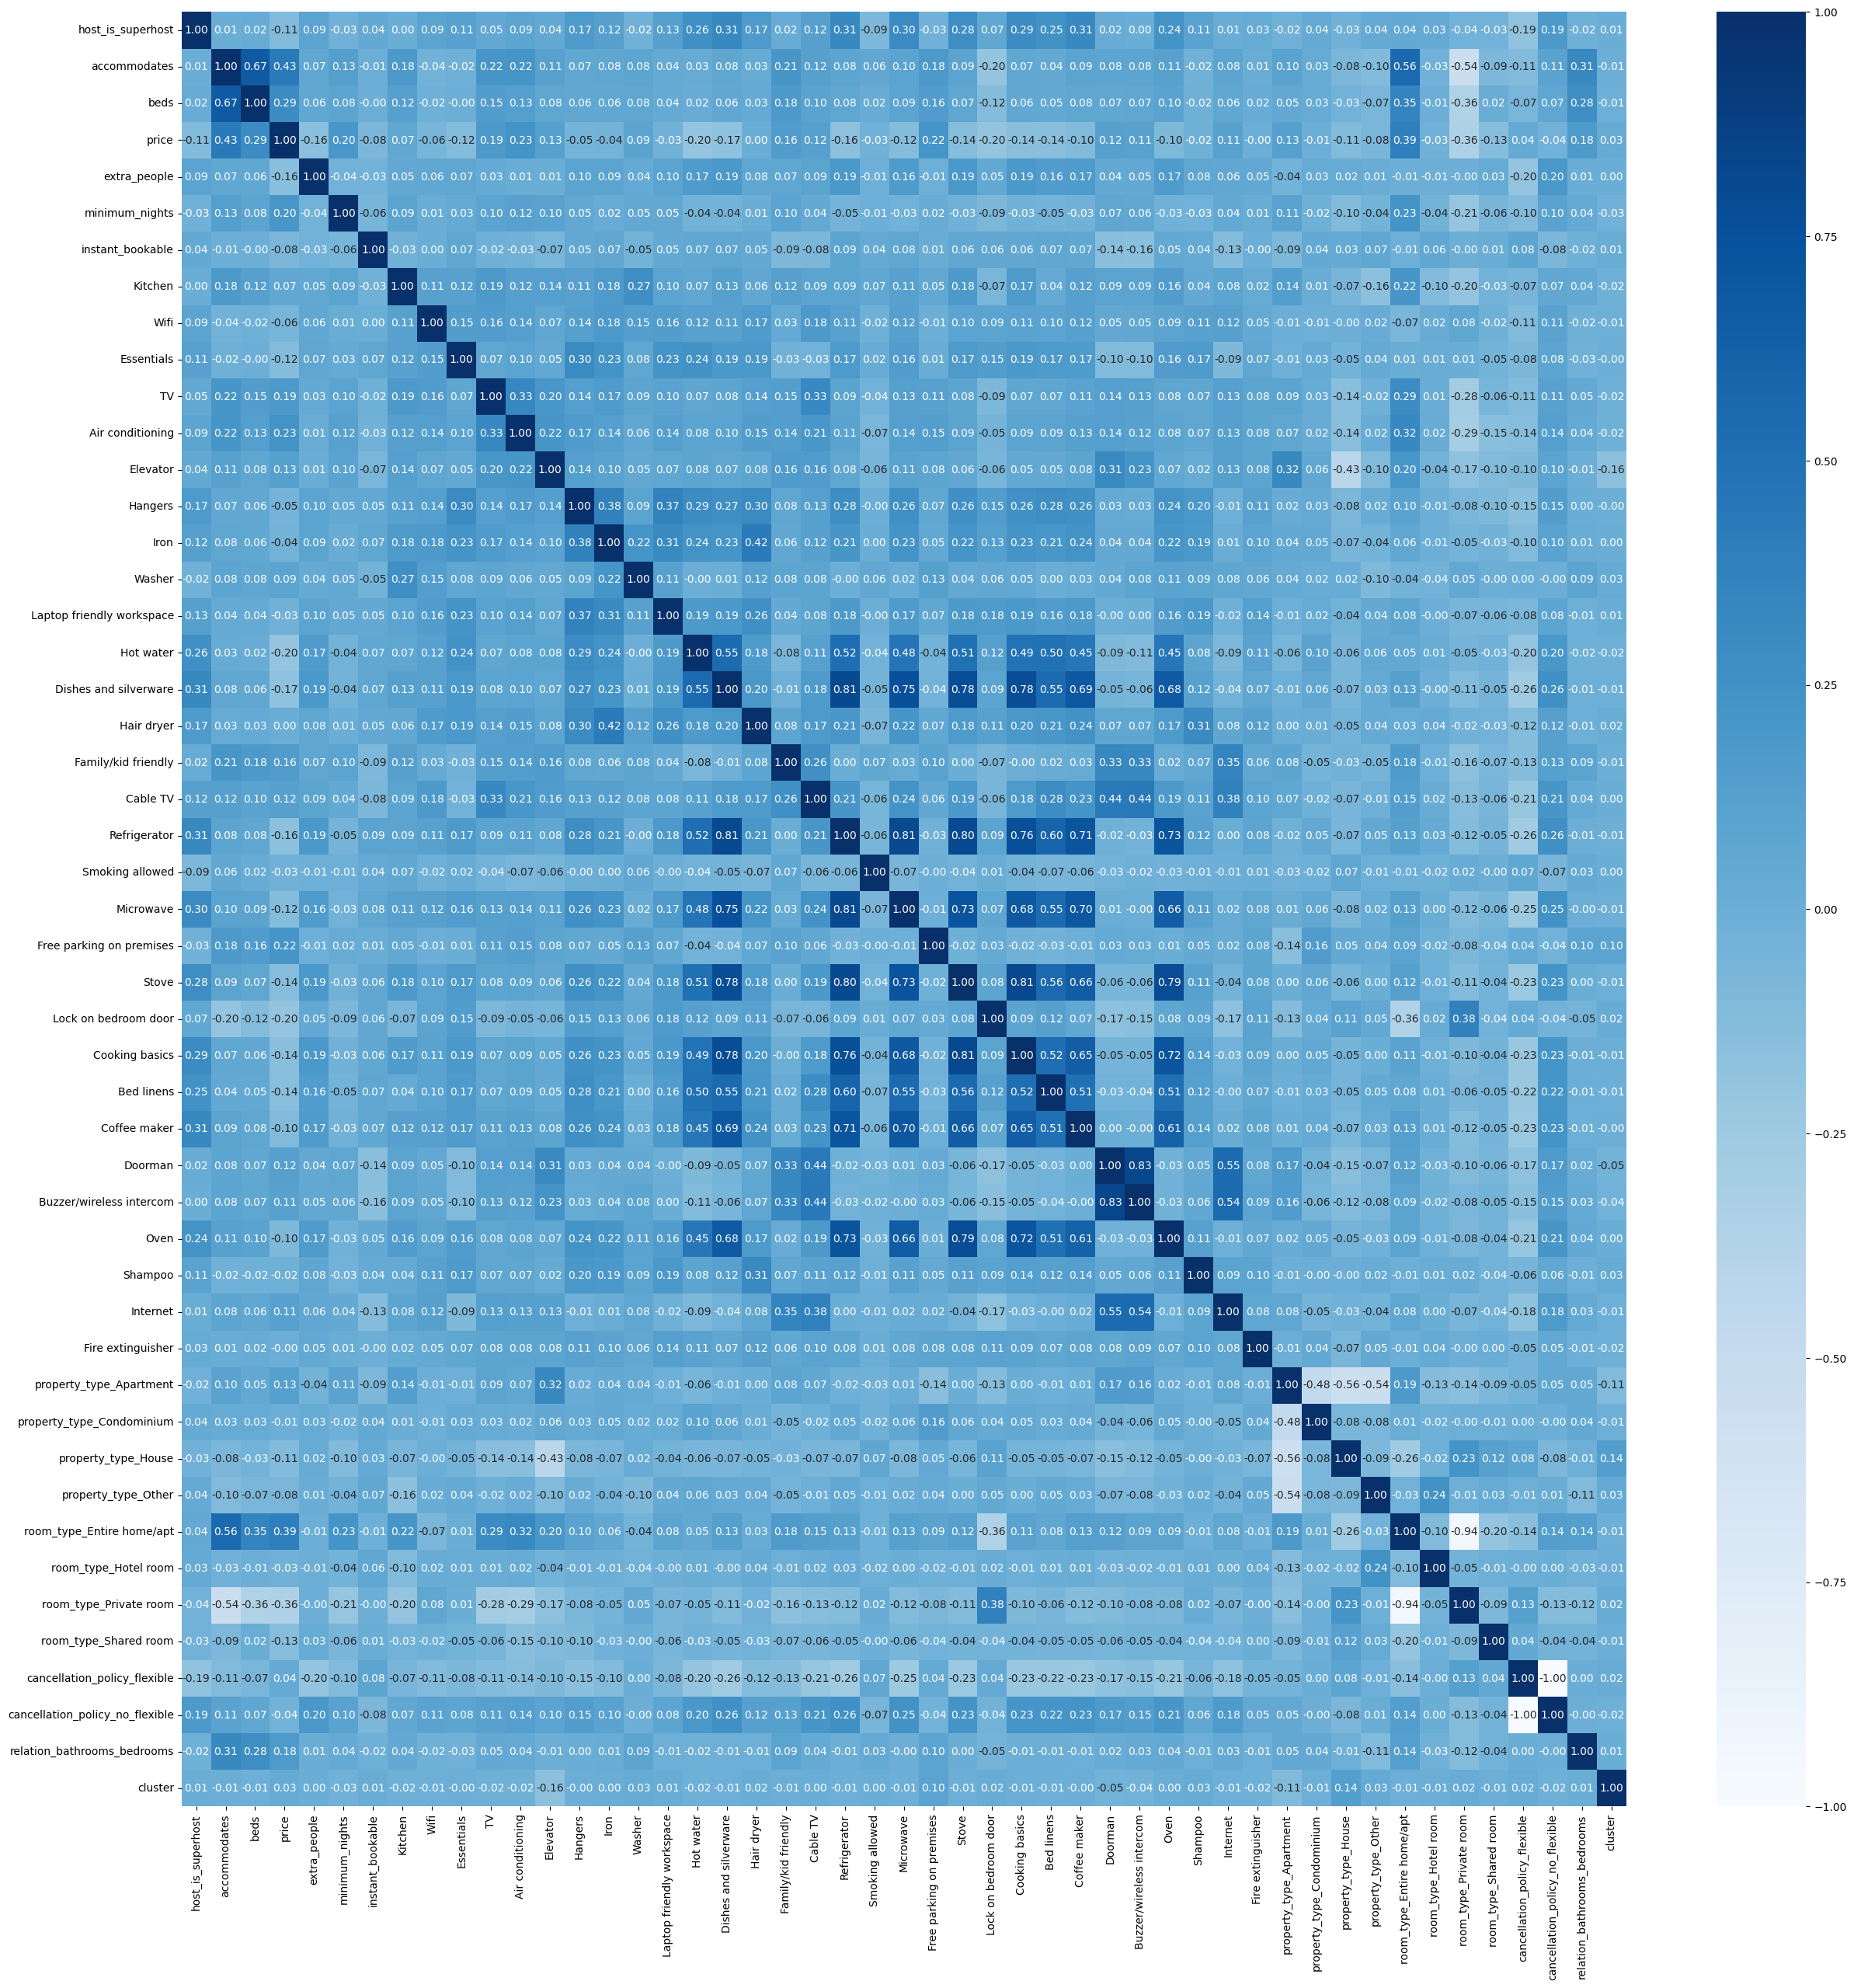

In [6]:
df = pd.read_csv(r'Dataframe_airbnb\listings_tratada_v3.csv')

plt.figure(figsize=(30 ,30))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')